In [2]:
import numpy as np
import matplotlib.pyplot as plt  # for 畫圖用
import pandas as pd
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from openpyxl import load_workbook
from openpyxl import Workbook

C:\Users\user1\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Import the training set
dataset_train = pd.read_excel('B(半導體).xlsx')  # 讀取訓練集
dataset_test = pd.read_excel('B(半導體)_測試.xlsx')
dataset_realtest = pd.read_excel('B(半導體)_50天_ques.xlsx')
data_all = pd.concat((dataset_train,dataset_test), axis = 0)
data_all=data_all.fillna(method="ffill",limit=10)
#dataset_train=dataset_train.dropna(axis=1)
training_set = data_all.iloc[:,[2,5,31,32,33,34,36,41,42,43,44,45,46]]#.values  # 取欄位值
training_set1= data_all.iloc[:, 1:2].values

In [4]:
training_set

,- MARKET VALUE,- PRICE INDEX,- ASK PRICE,- BID PRICE,- PRICE HIGH,- PRICE LOW,- OPENING PRICE,- UNADJ. PRICE OPEN,- UNADJUSTED PRICE,- UNADJ. ASK PRICE,- UNADJ. BID PRICE,- UNADJ. PRICE HIGH,- UNADJ. PRICE LOW
0,2697.94,82.5,20.45,20.40,11.25,11.05,11.08,20.25,16.90,20.45,20.40,20.75,19.90
1,2737.62,83.7,20.70,20.65,11.18,10.98,11.12,20.50,16.75,20.70,20.65,21.50,20.50
2,2737.62,83.7,20.70,20.65,11.18,10.98,11.12,20.50,16.75,20.70,20.65,21.50,20.50
3,2843.42,86.9,21.50,21.45,11.28,11.08,11.08,21.25,17.05,21.50,21.45,22.10,21.25
4,2830.19,86.5,21.40,21.35,11.31,11.21,11.25,21.40,17.20,21.40,21.35,21.75,21.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,2795.53,88.7,21.95,21.90,13.11,12.82,13.01,22.40,13.35,21.95,21.90,22.40,21.65
481,2801.90,88.9,22.05,22.00,12.97,12.58,12.82,22.10,13.20,22.05,22.00,22.35,21.85
482,2821.00,89.5,22.20,22.15,13.06,12.82,12.92,22.45,13.60,22.20,22.15,22.90,22.15
483,2801.90,88.9,22.05,22.00,13.11,12.68,13.06,22.10,13.25,22.05,22.00,22.40,21.95


In [67]:
real_stock_price =data_all.iloc[2100:2232,1].values

In [54]:
train = data_all.iloc[:2100,[2,5,31,32,33,34,36,41,42,43,44,45,46]]

In [68]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
sc1 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled1 = sc1.fit_transform(training_set1)

In [69]:
X_train = []   
y_train = []   
for i in range(7, 2100):  # 2100 是訓練集總數
    X_train.append(training_set_scaled[i-7:i,:])
    y_train.append(training_set_scaled1[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)  # 轉成numpy array的格式，以利輸入 RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*X_train.shape[2], 1))
# Import the Keras libraries and packages

# Initialising the RNN
regressor = Sequential()

In [70]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 進行訓練
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
2093/2093 [==============================] - 13s 6ms/step - loss: 0.0184
Epoch 2/100
2093/2093 [==============================] - 10s 5ms/step - loss: 0.0089
Epoch 3/100
2093/2093 [==============================] - 10s 5ms/step - loss: 0.0087
Epoch 4/100
2093/2093 [==============================] - 10s 5ms/step - loss: 0.0085
Epoch 5/100
2093/2093 [==============================] - 9s 4ms/step - loss: 0.0052
Epoch 6/100
2093/2093 [==============================] - 10s 5ms/step - loss: 0.0020
Epoch 7/100
2093/2093 [==============================] - 10s 5ms/step - loss: 0.0015
Epoch 8/100
2093/2093 [==============================] - 11s 5ms/step - loss: 0.0015
Epoch 9/100
2093/2093 [==============================] - 10s 5ms/step - loss: 0.0013
Epoch 10/100
2093/2093 [==============================] - 12s 5ms/step - loss: 0.0013
Epoch 11/100
2093/2093 [==============================] - 10s 5ms/step - loss: 0.0012
Epoch 12/100
2093/2093 [==============================] - 10s 5m

In [71]:
#test = sc.fit_transform(training_set)

In [72]:
X_test=[]
for i in range(2101, 2232):  # 1747 是訓練集總數
    X_test.append(training_set_scaled[i-7:i,0:])

In [73]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2], 1))

In [74]:
#list(X_test)

In [75]:
predicted_stock_price = regressor.predict(X_test)

In [76]:
predicted_stock_price = sc1.inverse_transform(predicted_stock_price)

Text(0,0.5,'B Price')

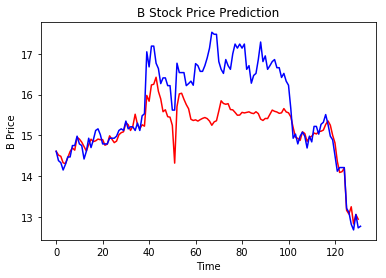

In [77]:
plt.plot(predicted_stock_price,color='red',label= 'predicted_stock_price')
plt.plot(real_stock_price,color = 'blue',label='real_stock_price')
plt.title('B Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('B Price')

In [87]:
wb = Workbook()

In [88]:
ws = wb.active

In [89]:
ws['A1'] = '收盤價'